
# Simple Linear Regression



Simply, regression means finding the relationship between the predictors (or features), usually denoted by $X$, and the outcome $y$. This relationship is then used to generate a model (or rule, algorithm). As a model, we can use it to predict the outcome for any given predictor. So the model becomes a general rule for the relationship on a given data scenario (e.g. relationship between salary and age, position, years of experiment)

The model is generally represented by an equation. There are 3 types of the equation used for performing regression:

**Simple Linear Regression:**

\begin{align*}
y &= b_0 + b_1 x_1\\
\end{align*}

**Multilinear Regression:**

\begin{align*}
y &= b_0 + b_1 x_1 + b_2 x_2 + b_3 x_3 + ... + b_n x_n\\
\end{align*}

Please note that the term *linear* refers to the use of linear constants *$b_0, b_1, ... b_n$*

**Polynomial Regression:**

\begin{align*}
y &= b_0 + b_1 x^1 + b_2 x^2 + b_3 x^3 + ... + b_n x^n\\
\end{align*}

.

In this note, we will start with Simple Linear Regression


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

For experiment, we have data in *Salary_Data.csv* containing 30 data items as below:

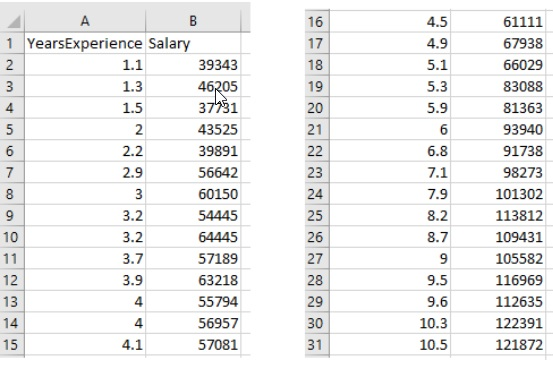

Let's read the data file and store the dataset to *mydataset*. Notie that it has *DataFrame* type of *pandas* package:

In [5]:
# Importing the dataset
mydataset = pd.read_csv('Salary_Data.csv')
X = mydataset.iloc[:, :-1].values  # get all rows, and all columns but minus one 
y = mydataset.iloc[:, 1].values  # get all rows and column 1
print("The type of mydataset: ", type(mydataset))
print("The length of mydataset: ", len(mydataset))
print("The shape of the mydataset: ", mydataset.shape)
print("\nThe first 5 records: \n", mydataset.head())
print("\nThe complete description of mydata:\n\n", mydataset.describe())

The type of mydataset:  <class 'pandas.core.frame.DataFrame'>
The length of mydataset:  30
The shape of the mydataset:  (30, 2)

The first 5 records: 
    YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

The complete description of mydata:

        YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


Let's plot the above data to see if there is anything, we (or the machine) can learn: 

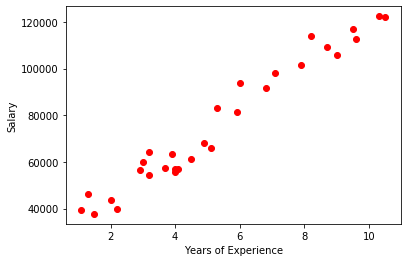

In [6]:
plt.scatter(X,y,color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

From the above plot, we could learn something, which we may use to predict, what could be the salary if, say, the years of experience is 15, 20 or 30 years. What we need to know is the relationship between the dependent variable, the outcome ***Salary*** and the independent variable, the predictor ***Years of Experience***. Finding this relationship is called doing regression. Looking at the above plot, intuitively we may guess that the relationship may be described or modelled as a line. And our taks is now to find this line.

Before that, we want to split the input dataset into training data and test data. The traning data is used to train the machine (the software machine), and the test data to test the machine. Please note that both training and test data are actual data. We will set 30% of the dataset to be test data.

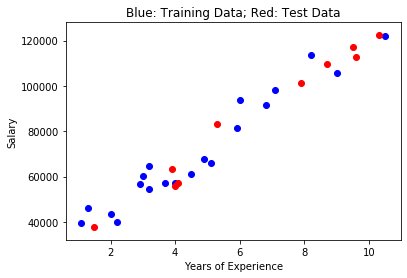

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
plt.scatter(X_train,y_train, color = "blue") #plot the train data 
plt.scatter(X_test,y_test, color = "red")   #plot the test data
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Blue: Training Data; Red: Test Data')
plt.show()

Simple Linear Regression uses the following model:


\begin{align*}
y &= b + m x\\
\end{align*}

```
    y = outcome 
    x = predictor
    b = the constant
    m = coefficient or slope
```

This is the core of the simple linear regression. The machine learns to find the correct/accurate coefficients $m$ and constant $b$. 

The machine is given ***X_train*** and ***y_train*** for learning/finding the $b$ and $m$ of the model. We use the *sklearn* package and import the *LinearRegression* module:



In [8]:
from sklearn.linear_model import LinearRegression   
myregressor = LinearRegression()    # Create the object for Linear Regression
myregressor.fit(X_train, y_train)   # Now fit the regressor to the training data, meaning let the machine learns 
                                    # the training dataset.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

At this point, the machine (implemented as *myregressor*) has learned the relationship between *X_train* and *y_train*. 
The machine knows already the model. Let us see what is the calculated/found slope (or *coefficient*) $m$ and the constant (or *intercept*) $b$:

In [9]:
slope_m = myregressor.coef_
constant_b = myregressor.intercept_
print("The slope m: ", slope_m)
print("The constant b: ", constant_b)

The slope m:  [9345.94244312]
The constant b:  26816.19224403119


Now that the machine has learned the model, we want to apply this model to the test data to generate the prediction, and print it: 

In [10]:
y_pred = myregressor.predict(X_test)
print("The calculated y_pred: \n", y_pred)

The calculated y_pred: 
 [ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


Let's plot the ***y_pred*** against the test data ***X_test***:

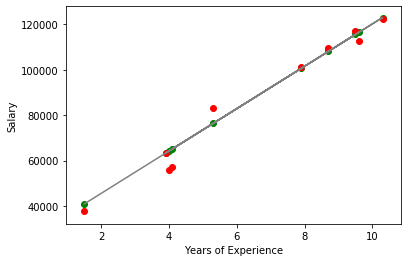

In [11]:
plt.scatter(X_test, y_pred, color='green')
plt.plot(X_test, y_pred, color='grey')
plt.scatter(X_test, y_test, color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

The grey line is the model or rule that the machine develops/learns. The green dots are the predicted outcome based on the rule. They are located on the line following the rule. The red dots are the actual data.

What do you think? How close is the predicted outcome (green dots) to the actual data (the red dots)? 

There are actually ways to measure how good is the model. But first, you may want to list the actual test data ***y_test*** and the predicted ***y_pred***:

In [12]:
df_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_table)

   Actual      Predicted
0   37731   40835.105909
1  122391  123079.399408
2   57081   65134.556261
3   63218   63265.367772
4  116969  115602.645454
5  109431  108125.891499
6  112635  116537.239698
7   55794   64199.962017
8   83088   76349.687193
9  101302  100649.137545


As you can see on the previous plot, the red dots are the actual sampled data and the grey line is the model that the machine has learned, via simple regression technique. 

The model is a straight line with the slope (also called as coefficient) ***m*** = 9345.94244312, and constant (or intercept) ***b*** = 26816.19224403119.

The model line equation is now becoming:
        
\begin{align*}
y &= 26816.19224403119 + 9345.94244312 x\\
\end{align*}

        
        X = Years of Experience
        y = Salary


Now let us plot the entire dataset (training and test data) and its model:

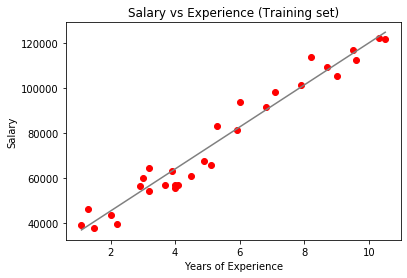

In [13]:
plt.scatter(X, y, color = 'red') # plot all dataset
plt.plot(X, myregressor.predict(X), color = 'grey') # plot the model
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

.

**Evaluating the Model/Algorithm (MAE, MSE, RMSE)**


Back to the question, how good is the model that the machine has learned? 

We will now evaluate the model. There are 3 measures that is common for evaluating the performance of the linear regression model:
1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. Root Mean Squared Error (RMSE)

Here are their formulas:

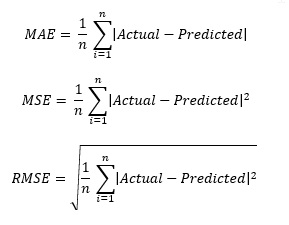

The package *sklearn* has methods to calculate the above measures:


In [14]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3426.4269374307123
Mean Squared Error: 21026037.329511296
Root Mean Squared Error: 4585.4157204675885


Among those three measures, the RMSE (Root Mean Squared Error) is the most commonly used.

We can compare the RMSE with the mean value of the actual data. Hence the calculated RMSE **4585.42** of test data, is to be compared with the actual mean of the *Salary* data, which is  **76003.00**. 

The comparison gives about 6%, which is still <10%, so that the model's performance can be regarded as decent. The fewer the percentage means the smaller the averaged eror as compared with the average of the actual data. 

**Some Resources**

Resources for dataset are publicly available and can be learned from this article: 

https://www.dataquest.io/blog/free-datasets-for-projects/

https://www.stats.govt.nz/large-datasets/csv-files-for-download/

The syntax rule for writing Markdown text can be found here:

https://help.github.com/en/articles/basic-writing-and-formatting-syntax

https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
 
 
